In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

 # Data Preparation

In [4]:
### Add some columns for Upvote metrics
df['Helpful%'] = np.where(df['HelpfulnessDenominator']>0 , df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


<b> Assigning different different labels to helpful% according to its value </b>

In [6]:
df['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
df['%Upvote'] = pd.cut(df['Helpful%'], bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [8]:
df.groupby(['Score','%Upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %Upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %Upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [9]:
df_s = df.groupby(['Score','%Upvote']).agg({'Id':'count'}).reset_index()

In [10]:
df_s

,Score,%Upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


### Create Pivot Table for better conclusion

In [11]:
pivot = df_s.pivot(index='%Upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%Upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='%Upvote'>

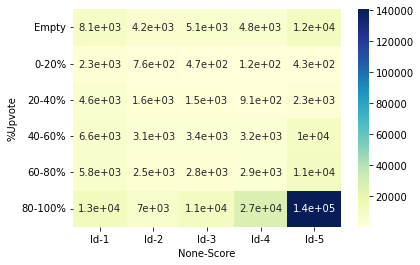

In [12]:
# Heatmap of it,for better Visualisations
sns.heatmap(pivot,annot=True,cmap="YlGnBu")

In [13]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [14]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [15]:
df2 = df[df['Score']!=3]

In [16]:
df2['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

### Creating a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way so that I can acheive my best accuracy

In [17]:
def text_fit(X,y,nlp_model,ml_model, coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('Feature:{}'.format(X_c.shape[1]))
    X_train,X_test, y_train,y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml = ml_model.fit(X_train,y_train)
    acc = ml.score(X_test,y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1 :
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coef_df = pd.DataFrame({'Word':w,'Coefficient':coef})
        coef_df=coef_df.sort_values(['Coefficient','Word'], ascending = False)
        print('\n')
        print('Top 20 Positive words')
        print(coef_df.head(20))
        print('\n')
        print('Top 20 Negative words')
        print(coef_df.tail(20))

In [18]:
nlp = CountVectorizer(stop_words = 'english')

In [19]:
text_fit(X, y, nlp, LogisticRegression())

Feature:114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9372175818156921


Top 20 Positive words
              Word  Coefficient
80600   pleasantly     4.237444
39072     downside     3.581001
94667    skeptical     3.309212
5865     addicting     2.842027
113138     worries     2.698714
87967       resist     2.562782
111911        whim     2.439359
55029       hooked     2.350660
54130     hesitant     2.312889
35726       delish     2.266214
102067    tastiest     2.185839
35691    delighted     2.157920
52060        guilt     2.140318
39214     drawback     2.098672
78641        penny     2.092519
58320       intend     2.059673
40342   economical     2.047939
23089       brings     2.045451
91260       scared     2.039329
103080    thankful     2.019661


Top 20 Negative words
                 Word  Coefficient
56229             ick    -2.389038
89868           ruins    -2.395222
21288           blech    -2.432853
91358           schar    -2.461434
35220     

In [20]:
def predict(X,y,nlp_model,ml_model):
    X_c = nlp_model.fit_transform(X)
    X_train,X_test, y_train,y_test = train_test_split(X_c,y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml = ml_model.fit(X_train,y_train)
    prediction = ml.predict(X_test)
    cm = confusion_matrix(prediction,y_test)
    print(cm)
    acc = accuracy_score(prediction,y_test)
    print(acc)
    

In [21]:
c = CountVectorizer(stop_words='english')
predict(X,y,c,LogisticRegression())

 train records: 394360
 test records: 131454
[[ 15100   3008]
 [  5475 107871]]
0.9354679203371522


In [22]:
text_fit(X, y , nlp, DummyClassifier(), 0)

Feature:114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8433672615515694


### Logistic regression model on TFIDF

In [23]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

Feature:114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9347452340742769


Top 20 Positive words
              Word  Coefficient
51300        great    13.941401
35641    delicious    12.170953
20308         best    11.988964
78889      perfect    10.617006
43222    excellent     9.879280
65108        loves     9.385970
54309       highly     9.190008
65072         love     8.481138
112883   wonderful     8.213322
7821       amazing     8.170048
10992      awesome     7.583208
50510         good     7.443412
55029       hooked     7.411318
72818         nice     7.152804
44752     favorite     7.027318
80600   pleasantly     6.980838
80608      pleased     6.913104
114428       yummy     6.907472
95450       smooth     6.760637
49855         glad     6.619671


Top 20 Negative words
                  Word  Coefficient
106852    unacceptable    -5.703860
88930              rip    -5.707427
107383     undrinkable    -5.838623
97956            stale    -5.933042
21211

In [24]:
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

 train records: 394360
 test records: 131454
[[ 14337   2324]
 [  6211 108582]]
0.9350723446985257


#### Accurany is roughly the same - 93.5%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

## Upvote prediction

In [25]:
data = df[df['Score'] == 5]

In [26]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful%', '%Upvote'],
      dtype='object')

In [27]:
data2 = data[data['%Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [28]:
X = data2['Text']

In [29]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%Upvote'].map(y_dict)

In [30]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %Upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative one's.

In [31]:
tf=TfidfVectorizer()

In [32]:
X_c=tf.fit_transform(X)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [34]:
y_test.value_counts()

1.0    45548
0.0      781
Name: %Upvote, dtype: int64

In [35]:
## RandomOverSampler to handle imbalanced data
ros =  RandomOverSampler()

In [36]:
X_train_res, y_train_res = ros.fit_resample(X_c, y)

In [37]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [38]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [39]:
log_class=LogisticRegression()

In [40]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [41]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [43]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  781     0]
 [  565 44983]]
0.9878046148200911
